In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib
matplotlib.rcParams['figure.dpi'] = 150

In [2]:
fp = '../data/final_results.csv'
df = pd.read_csv(fp, index_col=0)
df.head()

,epic,pl_mass,pl_mass_err+,pl_mass_err-,planet,mcmc_P(days)_,pl_radius,pl_rad_err,st_mass,kepmag,semi_amp
0,228974907,10.971196,3.486650,3.284672,b,20.782321,3.015405,0.498595,1.91000,9.344,1.655638
1,201437844,17.158749,3.547105,3.285974,b,21.057393,4.257261,0.156954,1.20200,9.234,3.510525
2,201437844,8.049473,2.435402,2.423370,c,9.552621,2.362897,0.180320,1.20200,9.234,2.143324
3,229004835,6.673436,2.587020,2.553379,b,16.138697,2.038059,0.276831,0.92914,10.151,1.771344
4,228721452,8.505294,4.791517,4.632442,b,4.563294,2.458291,0.911468,1.18900,11.325,2.918137


In [3]:
def weiss_mass(r_e):
    """
    For Rp < 4:
    https://arxiv.org/pdf/1312.0936.pdf
    Where does the factor of 5.5 come from? 
    """
    if r_e <= 1.5:
        # super-Earths and smaller
        return (2.43 + 3.39 * r_e) / 5.5 * r_e ** 3
    elif 1.5 < r_e <= 4:
        # sub-Neptunes
        return 2.69 * r_e ** 0.93
    else:
        # super-Neptunes
        return 317.8 * (r_e / 11.2) ** 3

plrad, plraderr = df[['pl_radius', 'pl_rad_err']].values.T

mass_w = [weiss_mass(i) for i in plrad]
n = 10000
mass_w_err = []
for plr,plre in zip(plrad, plraderr):
    r_s = np.random.randn(n) * plre + plr
    err = np.std([weiss_mass(i) for i in r_s])
    mass_w_err.append(err)

df['mass_w'] = mass_w
df['mass_w_err'] = mass_w_err

In [4]:
df.columns

Index(['epic', 'pl_mass', 'pl_mass_err+', 'pl_mass_err-', 'planet',
       'mcmc_P(days)_', 'pl_radius', 'pl_rad_err', 'st_mass', 'kepmag',
       'semi_amp', 'mass_w', 'mass_w_err'],
      dtype='object')

In [5]:
geom_mean = lambda *x: np.sqrt(np.product(x))
df['pl_mass_err'] = df[['pl_mass_err+', 'pl_mass_err-']].apply(geom_mean, axis=1)

[0.9,
 99,
 0.9,
 99,

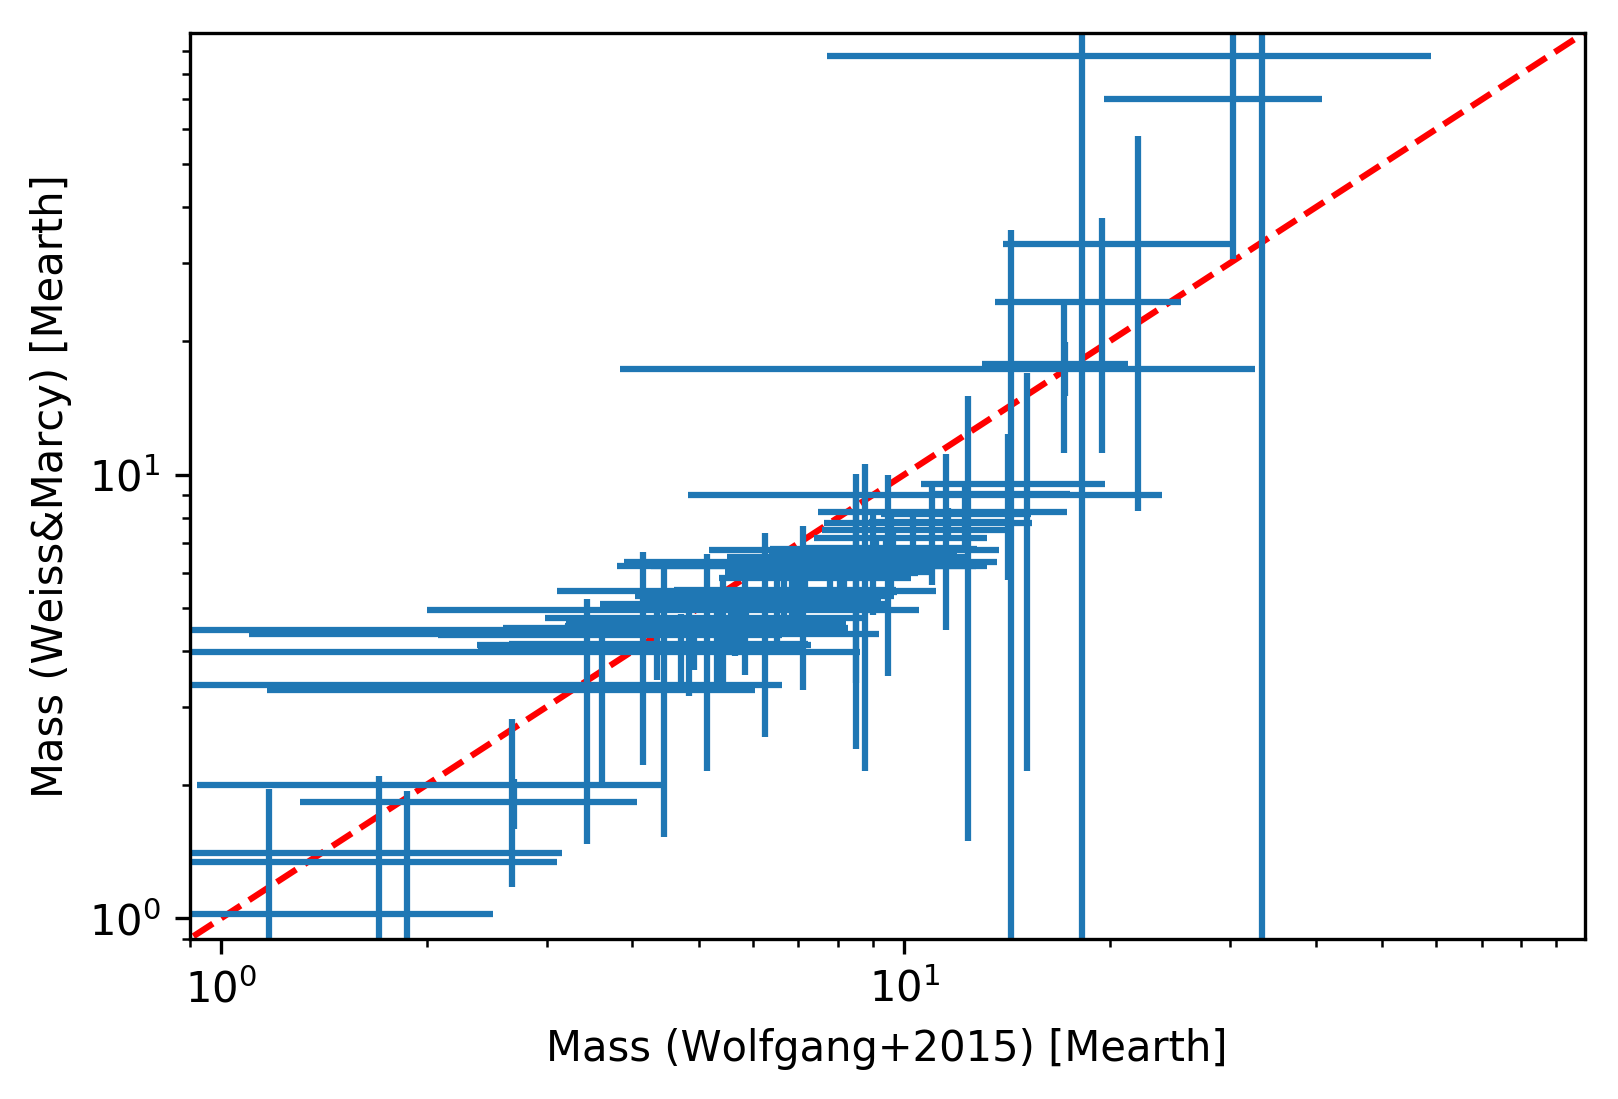

In [6]:
idx = df.pl_radius <= 8
fig, ax = pl.subplots(1, 1)
ax.errorbar(df[idx].pl_mass, df[idx].mass_w, df[idx].mass_w_err, df[idx].pl_mass_err, linestyle='none')
xmin, xmax = -0.1,100
ax.plot([xmin,xmax], [xmin,xmax], 'r--', zorder=0)
ax.set_xscale('log')
ax.set_yscale('log')
pl.setp(ax, xlim=(xmin+1,xmax-1), ylim=(xmin+1,xmax-1),
        xlabel='Mass (Wolfgang+2015) [Mearth]', ylabel='Mass (Weiss&Marcy) [Mearth]')